## Projet 5
***
### Optimisez la gestion des données d'une boutique

*Nous avons pour mission de mettre en relation deux bases de données qui ne sont pas connectées. La première prend la forme d'un fichier qui contient les données sur la gestion des ressources physiques, la deuxième est un fichier utilisé en ligne contenant les informations des produits commercialisés. Nous seront aidés d'un dernier fichier qui fera le lien.
Le tout est de s'assurer que notre lien est fiable avant de joindre nos données, une fois cela fait, nous analyserons ces dernières et nous assurerons qu'elles sont cohérentes.*

### Sommaire :
***

### <a href="#C1"><font color='Black'>Partie 1 : Préparation des données</font></a>
   - <a href="#C2">Importation des librairies</a>
   - <a href="#C3">Importation des données</a>
   - <a href="#C4">Traitement des données</a>
        - <a href="#C5">1) Liaison</a>
        - <a href="#C6">2) Erp</a>
        - <a href="#C7">3) Web</a>
       
***


### <a href="#C9"><font color='Black'>Partie 2 : Analyse des données</font></a>

   - <a href="#C10">1) Jointure entre ERP et WEB</a>
   - <a href="#C11">2) Chiffre d'affaire par produit</a> 
   - <a href="#C12">3) Chiffre d'affaire total</a> 
   - <a href="#C13">4) Analyse des prix</a>



## **<a name="C1"><font color='Black'>Partie 1 : Préparation des données</font></a>**
***
### <a name="C2"><font color='Black'>Importation des librairies :</font></a>
***
Les librairies que nous utiliserons sont les suivantes :
   - Numpy pour les tableaux et les opérations  
   - Pandas pour la manipulation des données
   - Matplotlib pour tracer des representations graphiques
   - Seaborn pour améliorer les graphiques
   


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <a name="C3"><font color='Black'>Importation des données</font></a>
***
Les fichiers de données à notre disposition sont les suivants :
   - **liaison.csv** : tableau de jointure entre ERP et WEB
   - **ERP.csv** : export de l'ERP 
   - **WEB.csv** : export contenant les informations des produits commercialisés en ligne


In [2]:
liaison = pd.read_csv("liaison.csv")
erp = pd.read_csv("erp.csv")
web = pd.read_csv("web.csv")

### <a name="C4"><font color='Black'>Traitement des données</font></a>
***
Avant de préparer nos données, nous devons obtenir une description exacte de ces dernières :
   - le nombre de lignes et de colonnes de chaque jeu de données
   - un dénombrage des valeurs totales et uniques
   - le type de chaque colonne
   - un dénombrage des valeurs nulles
   - un dénombrage des valeurs aberrantes

Pour cela, nous créons une fonction qui retourne un tableau comprenant toutes les informations dont nous avons besoin :

In [3]:
def info_donnee(df: pd.DataFrame):
    desc = df.columns.to_frame(name="colonne").set_index('colonne')
    desc['nombre de valeurs non nulles'] = df.notnull().sum() 
    desc['nombre de valeurs uniques'] = df.nunique() 
    desc['type de donnée'] = df.dtypes 
    desc['nombre de valeurs nulles']=df.isna().sum()
    desc['pourcentage de valeurs nulles']=round((df.isna().sum()/df.shape[0]*100),2)
    return desc

### <a name="C5"><font color='Black'>1) Fichier LIAISON</font></a>
***
#### Description
Le fichier "liaison" inclut :
   - id du fichier ERP : product_id
   - id du fichier WEB : id_web

Nous utilisons la fonction créée plus haut afin d'examiner le jeu de données :

In [4]:
info_donnee(liaison).reset_index()

,colonne,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles,pourcentage de valeurs nulles
0,product_id,825,825,int64,0,0.00
1,id_web,734,734,object,91,11.03


Nous constatons que les 2 colonnes n'ont pas le même nombre de valeurs uniques, donc tous les ID n'auront pas de correspondance. Il s'agit de références de produits non disponibles en ligne. Il y a 825 lignes dont 825 valeurs uniques pour product_id, il s'agit d'une clé de jointure unique.
#### Modification

Voici les modifications que nous allons apporter sur ce dataset :
   - modification du type product_id en object
   - renommage id_web en sku

In [5]:
liaison['product_id'] = liaison['product_id'].astype(object)

liaison = liaison.rename(columns={
    
    "id_web"  :  "sku"})

In [6]:
info_donnee(liaison).reset_index()

,colonne,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles,pourcentage de valeurs nulles
0,product_id,825,825,object,0,0.00
1,sku,734,734,object,91,11.03


### <a name="C6"><font color='Black'>2) Fichier ERP</font></a>
***
#### Description
Le fichier "erp" inclut :
   - les références produit
   - leur disponibilité en ligne
   - leur prix de vente
   - leur état et quantité de stock 

Nous utilisons la fonction créée plus haut afin d'examiner le jeu de données :

In [7]:
info_donnee(erp).reset_index()

,colonne,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles,pourcentage de valeurs nulles
0,product_id,825,825,int64,0,0.0
1,onsale_web,825,2,int64,0,0.0
2,price,825,381,float64,0,0.0
3,stock_quantity,825,128,int64,0,0.0
4,stock_status,825,2,object,0,0.0


Nous constatons qu'il n'y a pas de valeurs nulles, la variable onsale_web et stock_status peuvent  prendre 2 valeurs 1 ou 0, instock ou outofstock, ils se comportent comme des booléens. Il y a 825 lignes dont 825 valeurs uniques pour product_id, il s'agit d'une clé de jointure unique.
#### Modification

Voici les modifications que nous allons apporter sur ce dataset :
   - modification du type product_id en object
   - conversion du type de colonne de prix en float

In [8]:
erp['product_id'] = erp['product_id'].astype(object)

erp['price'] = erp['price'].astype(float)


In [9]:
info_donnee(erp).reset_index()

,colonne,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles,pourcentage de valeurs nulles
0,product_id,825,825,object,0,0.0
1,onsale_web,825,2,int64,0,0.0
2,price,825,381,float64,0,0.0
3,stock_quantity,825,128,int64,0,0.0
4,stock_status,825,2,object,0,0.0


### <a name="C7"><font color='Black'>3) Fichier WEB</font></a>
***
#### Description
Le fichier "web" inclut :
   - la réf du produit (sku)
   - les données sur les ventes
   - les données sur les produits

Nous utilisons la fonction créée plus haut afin d'examiner le jeu de données :

In [10]:
info_donnee(web).reset_index()

,colonne,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles,pourcentage de valeurs nulles
0,sku,1428,714,object,85,5.62
1,virtual,1513,1,int64,0,0.00
2,downloadable,1513,1,int64,0,0.00
3,rating_count,1513,1,int64,0,0.00
4,average_rating,1430,1,float64,83,5.49
5,total_sales,1430,41,float64,83,5.49
6,tax_status,716,1,object,797,52.68
7,tax_class,0,0,float64,1513,100.00
8,post_author,1430,2,float64,83,5.49
9,post_date,1430,716,object,83,5.49


Les dates sont du type object (post_date, post_date_gmt, post_modified, post_modified_gmt), beaucoup de colonnes contiennent uniquement des 0 (virtual downlodable, rating_count, average_rating, post_parent, menu_order, comment_count), d'autres sont vides (taxe_class, post_content, post_password, post_content_filtered ), nous avons à nouveau des variables qui se comportent comme des booléens (post_author, post_status, comment_status, ping_status, post_mime_type, post_type).
Notre clé sera Forcément sku, mais ne vérifie pas la règle d'unicité, seulement 714 valeurs uniques sur 1428.
#### Vérification de la clé primaire sku
   - recherche des valeurs nulles dans la colonne sku avec fonction isnull
   - affichage
   - repérage de valeurs exceptionnelles ligne 470 et 471
   - extraction des valeur non nulles pour sku uniquement 
   - exploration du jeu de donnée et constat que toutes les valeurs sont doublées car à chaque produit est rattaché une ligne attachment (images etc)
   - extration des lignes product uniquement
   - affichage infos tableau


In [27]:
sku_nul = web[web['sku'].isnull()]

sku_nul


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Constat 
Il y a 85 lignes nulles dans la colonne sku et dans les autres colonnes, dont 2 particulières que nous allons extraire. Les 85 lignes vont être ignorées pour notre analyse aujourd'hui.

In [25]:
lignes_a_remonter = sku_nul[sku_nul['tax_status'].notnull()]

lignes_a_remonter

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#### Constat 
2 lignes 470 et 471 laissent apparaitre des données sur certaines colonnes mais pas de sku, il convient de remonter cette information, il s'agit peut-être d'une erreur ou des traces d'anciens produits qui ne sont plus au catalogue. Ces lignes correspondent aux produits suivants : pierre-jean-villa-cote-rotie-fongeant-2017 et pierre-jean-villa-condrieu-suspendu-2018. 

In [13]:
web_sku_non_nul = web[web['sku'].notnull()]
info_donnee(web_sku_non_nul).reset_index() 

,colonne,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles,pourcentage de valeurs nulles
0,sku,1428,714,object,0,0.0
1,virtual,1428,1,int64,0,0.0
2,downloadable,1428,1,int64,0,0.0
3,rating_count,1428,1,int64,0,0.0
4,average_rating,1428,1,float64,0,0.0
5,total_sales,1428,41,float64,0,0.0
6,tax_status,714,1,object,714,50.0
7,tax_class,0,0,float64,1428,100.0
8,post_author,1428,2,float64,0,0.0
9,post_date,1428,714,object,0,0.0


#### Constat 
Nous avons 1428 lignes mais seulement 714 valeurs uniques pour sku, l'unicité n'est toujours pas vérifiée. Nous constatons que chaque sku produit est dédoublé avec une ligne attachment qui correspond aux données du site comme les images ou la description. Nous pouvons ignorer ces doublons.

In [14]:
web_product = web_sku_non_nul[web_sku_non_nul['post_type']=='product']
web_product
info_donnee(web_product).reset_index() 

,colonne,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles,pourcentage de valeurs nulles
0,sku,714,714,object,0,0.0
1,virtual,714,1,int64,0,0.0
2,downloadable,714,1,int64,0,0.0
3,rating_count,714,1,int64,0,0.0
4,average_rating,714,1,float64,0,0.0
5,total_sales,714,41,float64,0,0.0
6,tax_status,714,1,object,0,0.0
7,tax_class,0,0,float64,714,100.0
8,post_author,714,2,float64,0,0.0
9,post_date,714,714,object,0,0.0


#### Conclusion
Nous avons maintenant un dataset qui dispose de 714 lignes dont 714 valeurs uniques pour la colonne sku. Il s'agit bien d'une clé primaire utilisable. 

## **<a name="C9"><font color='Black'>Partie 2 : Analyse des données</font></a>**
***
Nos données sont desormais nettoyées et homogénéisées, nous allons procéder dans un premier temps à la jointure entre les fichiers puis à l'analyse de ces dernières.

### <a name="C10"><font color='Black'>1) Fusion des données ERP et WEB</font></a>
***
#### Démarche
   - fusion des fichiers ERP et LIAISON sur clé product_id avec jointure externe et indication de la présence de la jointure avec indicator
   - repérage des valeurs autres que both dans la colonne merge
   - suppression de la colonne merge avec drop
   - fusion du fichier créé avec WEB_PRODUCT sur clé sku avec jointure externe et indication de la présence de la jointure avec indicator
   - repérage des valeurs autres que both dans la colonne merge
   - affichage des 111 lignes id_web qui n'ont pas de correspondance
   - extraction des ligne qui ont une correspondance merge = both
   - suppression de la colonne merge avec drop
   - affichage du dataset final


In [15]:
join_erp = pd.merge(erp, liaison, on=["product_id"], how='outer', indicator=True)

join_erp_noboth = join_erp[join_erp['_merge']!='both']

join_erp_noboth


,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge


#### Constat 
Le tableau affiché est vide, toutes les lignes ont trouvé une correspondance.

In [16]:
join_erp = join_erp.drop(['_merge'], axis=1)

join_erp_web = join_erp.merge(web_product, on='sku', how='outer', indicator=True)

join_erp_web_noboth = join_erp_web[join_erp_web['_merge']!='both']

join_erp_web_noboth

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


#### Constat 
Le tableau affiche 111 lignes, toutes les lignes n'ont pas trouvé de correspondance. Nous constatons qu'il s'agit de left_only dans la colonne merge, donc les valeurs qui n'ont pas trouvé de correspondance se situent dans le dataframe de gauche, ce qui correspondant avant renommage à la variable id_web. Il convient de remonter cette information, pour la suite de notre analyse, nous mettrons de côté ces lignes.

In [17]:
join_erp_web_final = join_erp_web[join_erp_web['_merge']=='both']

join_erp_web_final = join_erp_web_final.drop(['_merge'], axis=1)

join_erp_web_final

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#### Conclusion
Nous disposons d'un tableau contenant toutes les informations nécessaires à notre analyse.
###  <a name="C11"><font color='Black'>2) Chiffre d'affaires par produit</font></a>  
***
#### Démarche
   - création d'une colonne chiffre d'affaires par produit en multipliant la colonne prix avec la colonne total ventes
   - création d'un tableau en regroupant faisant la somme des résultats par intitulé de produit
   - affichage du tableau

In [18]:
join_erp_web_final["chiffre_affaires_produit"] = join_erp_web_final["price"]*join_erp_web_final["total_sales"]

tableau_ca_produit = join_erp_web_final[['post_title','price','total_sales','chiffre_affaires_produit']].groupby('post_title').sum()

tableau_ca_produit


,price,total_sales,chiffre_affaires_produit
post_title,,,
Agnès Levet Côte Rôtie Améthyste 2017,41.2,4.0,164.8
Agnès Levet Côte Rôtie Maestria 2017,55.0,3.0,165.0
Agnès Levet Côte Rôtie Péroline 2017,57.0,3.0,171.0
Alain Graillot Crozes-Hermitage Blanc 2018,24.4,10.0,244.0
Alain Graillot Crozes-Hermitage Rouge 2017,24.4,6.0,146.4
...,...,...,...
Zind-Humbrecht Pinot Gris Roche Calcaire 2017,23.0,0.0,0.0
Zind-Humbrecht Riesling Clos Windsbuhl 2014,69.0,0.0,0.0
Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017,100.0,0.0,0.0


#### Conclusion
Nous disposons d'un tableau indiquant le chiffre d'affaires par intitulé de produits.
###  <a name="C12"><font color='Black'>2) Chiffre d'affaires total</font></a>  
***
#### Démarche
   - somme des chiffres d'affaires par produit
   - sélection des produits vendus en ligne onsale_web = 1
   - somme des chiffres d'affaires des produits vendus en ligne

In [19]:
chiffre_affaires_total = join_erp_web_final["chiffre_affaires_produit"].sum()

print("Chiffre d'affaires total :", chiffre_affaires_total, "€")

ventes_enligne = join_erp_web_final.loc[join_erp_web_final["onsale_web"]==1]

chiffre_affaires_enligne = ventes_enligne["chiffre_affaires_produit"].sum()

print("Le chiffre d'affaire en ligne total est de", chiffre_affaires_enligne, "€")

Chiffre d'affaires total : 70568.6 €
Le chiffre d'affaire en ligne total est de 70568.6 €


#### Conclusion
Le chiffre d'affaires total est égale au chiffre d'affaires en ligne, en effet notre fichier ne regroupe que les ventes de la boutique en ligne.
###  <a name="C13"><font color='Black'>3) Analyse des prix</font></a>  
***
#### Information sur les prix
   - création d'un tableau qui affichera les données statistiques utiles

In [20]:
info_prix = pd.DataFrame({'informations sur les prix':                           
    [join_erp_web_final["price"].mean(),
     join_erp_web_final["price"].median(),
     join_erp_web_final["price"].count(),
     join_erp_web_final["price"].std(),
     join_erp_web_final["price"].min(),
     join_erp_web_final["price"].max(),]},
    index = ['moyenne des prix (€)', 'mediane des prix (€)',
             'nombre de valeurs', 'ecart type des prix (€)',
             'prix minimum (€)', 'prix maximum (€)', 
             ])                      
info_prix

,informations sur les prix
moyenne des prix (€),32.493137
mediane des prix (€),23.550000
nombre de valeurs,714.000000
ecart type des prix (€),27.810525
prix minimum (€),5.200000
prix maximum (€),225.000000


#### Interprétation
Ce tableau nous indique que nous avons 714 valeurs de prix qui vont de 5€20 à 225€. La moyenne de ces prix étant de 32€49, tandis que la médiane se trouve à 23€55, ce qui indique que plus de prix se trouve sous la barre de 32€49. L'écart type de 26€81 indique que la dispersion est plutôt faible.

#### <a name="C14"><font color='Black'>Distribution des prix</font></a>
   - visualisation de la distribution des prix sur un histogramme

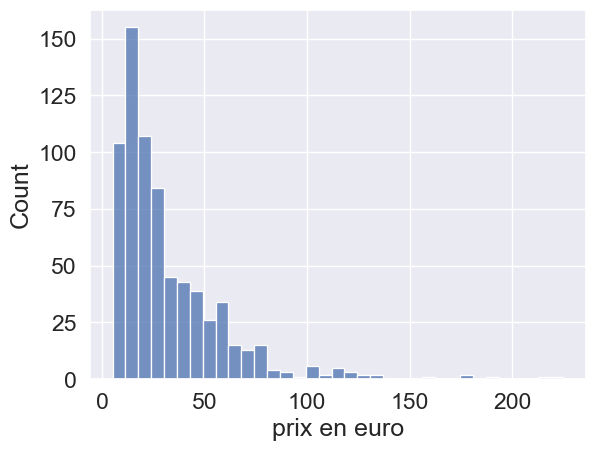

In [21]:
sns.set(font_scale=1.5)
sns.histplot(join_erp_web_final["price"])
plt.xlabel('prix en euro')
plt.savefig('histplot_prix.png')


#### Interprétation
Nous constatons que la répartition des prix est inégale, en effet la majorité des produits ont des couts peu élevés, seulement quelques produits ont des couts élevés, on pourrait penser que ce sont des valeurs aberrantes mais ce n'est pas forcément le cas, en effet les spiritueux peuvent avoir des prix de vente très élevés.

#### <a name="C15"><font color='Black'>Repérer les valeurs aberrantes</font></a>
   - visualisation des données aberrantes via une boite à moustache

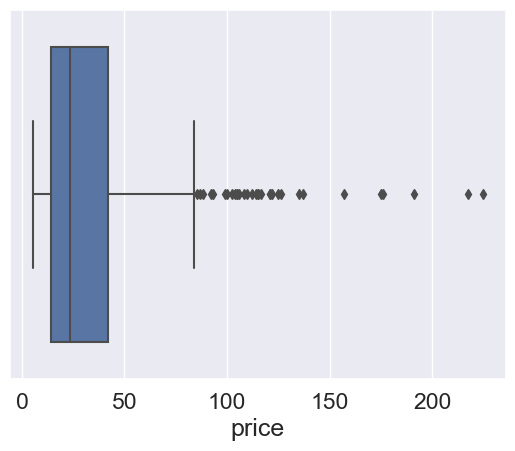

In [22]:
boite_moustache = sns.boxplot(x=join_erp_web_final["price"])

comprendre le diagramme :
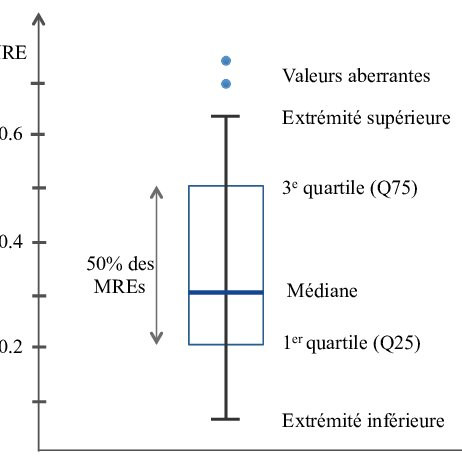
#### Interprétation
La boite à moustache permet de visualiser la médiane en un coup d'oeil, ainsi que 50% de la distibution des valeurs autour. Nous remarquons que la représentation se déplace plutôt sur la gauche au niveau des petites valeurs (entre 0 et 50€). 
Le bas et le haut de la boîte montre les 25e et 75e quantiles. Ces deux quantiles sont également appelés quartiles car chacun coupe un quart (25 %) des données. La longueur de la boîte est la différence entre ces deux quantiles et elle est appelée intervalle interquartile (IQR). 
On considère comme valeurs aberrantes les valeurs se trouvant au delà de 1,5xIQR. Nous allons regarder ces données de plus près.
#### <a name="C16"><font color='Black'>Calcul de l'intervalle interquartile</font></a>
   - determination des 1er quartile et 3ème quartile avec la fonction quantile
   - Calcul de l'intervalle interquartile
   - calcul de l'extremité supérieure de la boite à moustache
    

In [23]:
quartile75 = np.quantile(join_erp_web_final["price"], .75)

quartile25 = np.quantile(join_erp_web_final["price"], .25)

Intercartile = quartile75 -quartile25

coeficient_sensibilite = 1.5

extremite_sup = quartile75 + coeficient_sensibilite * Intercartile

print("L'extrémité supérieure de la boite à moustache est :", extremite_sup)


L'extrémité supérieure de la boite à moustache est : 84.28750000000001


#### Interprétation
Nous considérons tous les prix supérieurs à 84€28 comme étant aberrants.
#### <a name="C17"><font color='Black'>Etude des valeurs aberrantes</font></a>
   - extraction des prix supérieurs à extremite_sup
   - affichage du prix et de l'intitulé du produit
   - classement par prix décroissant et ajout d'un index

In [24]:
valeurs_aberrantes = join_erp_web_final.loc[(join_erp_web_final["price"] > extremite_sup),("post_title","price")]

valeurs_aberrantes.sort_values(by=["price"], ascending=False).reset_index(drop=False)
                               

,index,post_title,price
0,291,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0
1,525,David Duband Charmes-Chambertin Grand Cru 2014,217.5
2,692,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3
3,310,Cognac Frapin VIP XO,176.0
4,657,Camille Giroud Clos de Vougeot 2016,175.0
5,313,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0
6,478,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0
7,752,Champagne Gosset Célébris Vintage 2007,135.0
8,293,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5
9,615,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8


#### Interprétation
Nous disposons de 32 produits dont les prix sont considérés comme valeurs aberrantes. Un regard rapide permet de constater des appellations "Grand Cru" ou "Millesimé", ce qui pourrait nous indiquer des prix supérieurs à la normale. Le seul moyen de confirmer cette théorie est d'envoyer cette liste au service concerné pour validation.
